In [63]:
import pandas as pd

# Check how similar TE are using blast 

In [64]:
TE_gene = pd.read_csv('TransposableElementGene.tsv', sep = '\t', index_col=0)

In [65]:
TE_LTR = pd.read_csv('TE_LTR.tsv', sep = '\t')

In [66]:
TE_LTR = TE_LTR.set_index('Retrotransposon > Overlapping Features > Systematic Name')

In [67]:
TE_gene = TE_gene.join(TE_LTR [['Retrotransposon > Brief Description', 'Retrotransposon > Status']])

In [84]:
TE_gene.head()

,Transposable Element Gene > Standard Name,Transposable Element Gene > Name,Transposable Element Gene > Chromosome > Identifier,Transposable Element Gene > Feature Type,Transposable Element Gene > Length,Transposable Element Gene > Description,Transposable Element Gene > Brief Description,Transposable Element Gene > Sgd Alias,Transposable Element Gene > Status,Retrotransposon > Brief Description,Retrotransposon > Status,Chromosome,start,end,Homolgy to,Ty type,size
YAR009C,NaN,NaN,chrI,transposable element gene,3591,Retrotransposon TYA Gag and TYB Pol genes; Gag...,Retrotransposon TYA Gag and TYB Pol genes,truncated gag-pol fusion protein|YARCTyB1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active,I,164187,"160597,",YGR038C-B,Ty1,Full
YAR009C,NaN,NaN,chrI,transposable element gene,3591,Retrotransposon TYA Gag and TYB Pol genes; Gag...,Retrotransposon TYA Gag and TYB Pol genes,truncated gag-pol fusion protein|YARCTyB1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active,I,164187,"160597,",YDR034C-D,Ty2,Full
YAR009C,NaN,NaN,chrI,transposable element gene,3591,Retrotransposon TYA Gag and TYB Pol genes; Gag...,Retrotransposon TYA Gag and TYB Pol genes,truncated gag-pol fusion protein|YARCTyB1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active,I,164187,"160597,",YPL060C-A,Ty4,Truncated
YAR010C,NaN,NaN,chrI,transposable element gene,1323,Retrotransposon TYA Gag gene co-transcribed wi...,Retrotransposon TYA Gag gene co-transcribed wi...,gag protein|YARCTyA1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active,I,165866,"164544,",YGR038C-B,Ty1,Truncated
YAR010C,NaN,NaN,chrI,transposable element gene,1323,Retrotransposon TYA Gag gene co-transcribed wi...,Retrotransposon TYA Gag gene co-transcribed wi...,gag protein|YARCTyA1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active,I,165866,"164544,",YDR034C-D,Ty2,Truncated


In [69]:
blast_TE = pd.read_excel('blasted_TE.xlsx', index_col=0 )

In [70]:
TE_gene = TE_gene.join(blast_TE)

In [71]:
len(set(blast_TE.index) & set(TE_gene.index))

91

In [72]:
set(blast_TE.index) - set(TE_gene.index)

{'YCL074W', 'YIL082W'}

In [73]:
TE_gene[TE_gene.index == 'YCL074W']

,Transposable Element Gene > Standard Name,Transposable Element Gene > Name,Transposable Element Gene > Chromosome > Identifier,Transposable Element Gene > Feature Type,Transposable Element Gene > Length,Transposable Element Gene > Description,Transposable Element Gene > Brief Description,Transposable Element Gene > Sgd Alias,Transposable Element Gene > Status,Retrotransposon > Brief Description,Retrotransposon > Status,Chromosome,start,end,Homolgy to,Ty type,size


In [74]:
blast_TE[blast_TE.index == 'YCL074W']

,Chromosome,start,end,Homolgy to,Ty type,size
Gene,,,,,,
YCL074W,III,2824,"3750,",YGR038C-B,Ty1,Truncated
YCL074W,III,2824,"3750,",YDR034C-D,Ty2,Truncated
YCL074W,III,2824,"3750,",YPL060C-A,Ty4,Truncated


In [75]:
len(set(TE_gene.index) - set(blast_TE.index))

0

In [76]:
set(TE_gene.index) - set(blast_TE.index)

set()

In [77]:
blast_short = blast_TE[~blast_TE.index.duplicated(keep='first')]

In [78]:
blast_short.to_excel('blast_TE_no duplicates.xlsx')

In [79]:
blast_short['Homolgy to'].value_counts()

YGR038C-B    84
YPL060C-A     5
YGR109W-B     4
Name: Homolgy to, dtype: int64

In [81]:
truncated = blast_TE[blast_TE['size'] == 'Truncated']

In [83]:
truncated = truncated[~truncated.index.duplicated(keep='first')]
truncated['Homolgy to'].value_counts()

YGR038C-B    46
YPL060C-A    43
YGR109W-B     2
Name: Homolgy to, dtype: int64

In [80]:
blast_TE

,Chromosome,start,end,Homolgy to,Ty type,size
Gene,,,,,,
YGR038C-B,VII,566161,"562199,...",YGR038C-B,Ty1,Full
YPR137C-B,XVI,808963,"805001,...",YGR038C-B,Ty1,Full
YDR098C-B,IV,649820,"645858,6...",YGR038C-B,Ty1,Full
YPL257W-B,XVI,56748,"58052,58...",YGR038C-B,Ty1,Full
YLR157C-B,XII,480295,"476333,...",YGR038C-B,Ty1,Full
...,...,...,...,...,...,...
YBR012W-B,II,259869,"261173,2...",YPL060C-A,Ty4,Truncated
YGR161C-D,VII,821709,"817747,...",YPL060C-A,Ty4,Truncated
YDR261W-B,IV,981462,"982754,9...",YPL060C-A,Ty4,Truncated


# TE from liftoff

In [122]:
TE_lo = pd.read_excel('TE_liftoff4_yps1009.xlsx', index_col= 4)

In [123]:
TE_lo.drop(['Unnamed: 0'], axis=1, inplace=True)

In [124]:
TE_lo.shape

(99, 18)

In [126]:
TE_LTR_dic = TE_LTR[['Retrotransposon > Brief Description']].to_dict()

In [132]:
TE_LTR_dic = TE_LTR_dic['Retrotransposon > Brief Description']

In [129]:
TE_LTR_dic

{'Retrotransposon > Brief Description': {'YAR009C': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YAR010C': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YARCdelta4': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YARCdelta5': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBL005W-A': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBL005W-B': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBLWdelta10': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBLWdelta9': 'Ty1 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBL100W-A': 'Ty2 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBL100W-B': 'Ty2 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBLWdelta4': 'Ty2 element, LTR retrotransposon of the Copia (Pseudoviridae) group',
  'YBLWdelta5

In [119]:
TE_lo = TE_lo.join(TE_LTR[['Retrotransposon > Brief Description']])

In [136]:
ind = TE_lo.index
ty = []
for i in ind:
    if i in TE_LTR_dic:
        ty.append(TE_LTR_dic[i])
    else:
        ty.append('')

In [138]:
TE_lo['Ty type'] = ty

In [140]:
TE_lo['length'] = TE_lo.apply(lambda x: x['end'] - x['start'], axis=1)

In [141]:
TE_lo

,seq_id,start,end,Alias,Note,Ontology_term,score,strand,phase,copy_num_ID,coverage,curie,display,extra_copy_number,sequence_ID,valid_ORFs,Chromosome,Contig,Ty type,length
Name,,,,,,,,,,,,,,,,,,,,
YDR034C-C,chrI_tig00000033,177837,179152,gag%20protein,Retrotransposon TYA Gag gene co-transcribed wi...,"GO:0000943,GO:0003723,GO:0032197,SO:0000704",.,+,.,YDR034C-C_4,0.999,SGD:S000007344,Retrotransposon TYA Gag gene co-transcribed wi...,4,0.973,0,1,tig00000033,"Ty2 element, LTR retrotransposon of the Copia ...",1315
YBL100W-A,chrII_tig00000010,185379,186695,"TY2A_B,YBL101W-A,gag%20protein",Retrotransposon TYA Gag gene co-transcribed wi...,"GO:0000943,GO:0003723,GO:0032197,SO:0000704",.,+,.,YBL100W-A_0,1.000,SGD:S000002148,Retrotransposon TYA Gag gene co-transcribed wi...,0,0.962,1,2,tig00000010,"Ty2 element, LTR retrotransposon of the Copia ...",1316
YOR343W-A,chrII_tig00000011,185379,186695,"YOR343C-A,gag%20protein",Retrotransposon TYA Gag gene co-transcribed wi...,"GO:0000943,GO:0003723,GO:0032197,SO:0000704",.,+,.,YOR343W-A_0,1.000,SGD:S000007355,Retrotransposon TYA Gag gene co-transcribed wi...,0,0.956,1,2,tig00000010,"Ty2 element, LTR retrotransposon of the Copia ...",1316
YDR034C-C,chrII_tig00000012,140850,142166,gag%20protein,Retrotransposon TYA Gag gene co-transcribed wi...,"GO:0000943,GO:0003723,GO:0032197,SO:0000704",.,-,.,YDR034C-C_3,1.000,SGD:S000007344,Retrotransposon TYA Gag gene co-transcribed wi...,3,0.974,1,3,tig00004936,"Ty2 element, LTR retrotransposon of the Copia ...",1316
YBL100W-B,chrII_tig00000013,1298022,1303335,"TY2B_B,YBL101W-B,gag-pol%20fusion%20protein",Retrotransposon TYA Gag and TYB Pol genes%3B t...,"GO:0000943,GO:0003723,GO:0003887,GO:0003964,GO...",.,-,.,YBL100W-B_0,0.999,SGD:S000002149,Retrotransposon TYA Gag and TYB Pol genes,0,0.969,1,4,tig00000001,"Ty2 element, LTR retrotransposon of the Copia ...",5313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR142W-B,chrII_tig00000103,415070,420336,gag-pol%20fusion%20protein,Retrotransposon TYA Gag and TYB Pol genes%3B t...,"GO:0000943,GO:0003723,GO:0003887,GO:0003964,GO...",.,-,.,YOR142W-B_0,0.998,SGD:S000007352,Retrotransposon TYA Gag and TYB Pol genes,0,0.941,0,12,tig00004934,"Ty1 element, LTR retrotransposon of the Copia ...",5266
YPR158W-B,chrII_tig00000104,415070,420336,gag-pol%20fusion%20protein,Retrotransposon TYA Gag and TYB Pol genes%3B t...,"GO:0000943,GO:0003723,GO:0003887,GO:0003964,GO...",.,-,.,YPR158W-B_0,0.997,SGD:S000007364,Retrotransposon TYA Gag and TYB Pol genes,0,0.929,0,12,tig00004934,"Ty1 element, LTR retrotransposon of the Copia ...",5266
YDR034C-C,chrII_tig00000105,112411,113727,gag%20protein,Retrotransposon TYA Gag gene co-transcribed wi...,"GO:0000943,GO:0003723,GO:0032197,SO:0000704",.,+,.,YDR034C-C_1,1.000,SGD:S000007344,Retrotransposon TYA Gag gene co-transcribed wi...,1,0.974,1,15,tig00000007,"Ty2 element, LTR retrotransposon of the Copia ...",1316


# TE ultimate results and comparison

In [4]:
stats = pd.read_csv('Num_transposon_byclass.txt', sep = '\t')

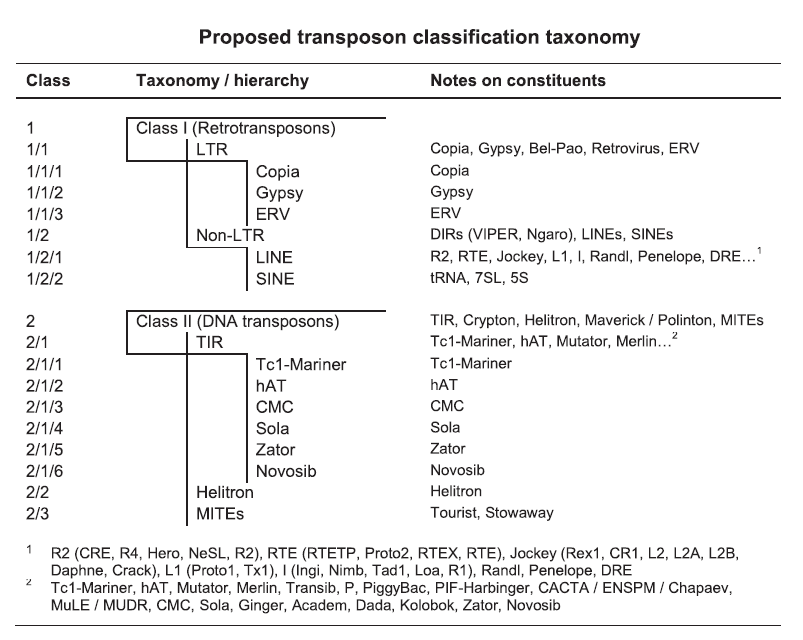

From this tale I think I only want to consider class 1 transposons 

In [7]:
stats[:][:10]

,SeqID,SeqName,all,1,1/1,1/1/1,1/1/2,1/1/3,1/2,1/2/1,...,2,2/1,2/1/1,2/1/2,2/1/3,2/1/4,2/1/5,2/1/6,2/2,2/3
all,all,255,57,57,20,37,0,0,0,0,...,196,42,26,15,12,99,2,0,2,NaN
seq1,chrII-2_tig00004927 reverse_complement,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
seq2,chrIII-2_tig00004935,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,NaN
seq3,chrIII_tig00004936,7,2,2,1,1,0,0,0,0,...,5,0,2,0,0,3,0,0,0,NaN
seq4,chrII_tig00000010 reverse_complement,13,4,4,1,3,0,0,0,0,...,9,1,0,0,1,7,0,0,0,NaN
seq5,chrI_tig00000033,9,2,2,2,0,0,0,0,0,...,7,0,3,3,0,1,0,0,0,NaN
seq6,chrIV_tig00000001,26,5,5,2,3,0,0,0,0,...,21,4,2,0,1,14,0,0,0,NaN
seq7,chrIX_tig00000023,7,1,1,1,0,0,0,0,0,...,4,0,0,0,0,4,0,0,2,NaN
seq8,chrMito_tig00000037 reverse_complement,22,0,0,0,0,0,0,0,0,...,22,11,0,1,4,6,0,0,0,NaN
seq9,chrVI-2_tig00004937 reverse_complement,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
